# Doctor's Consultation Fees Prediction

# Data Description

Problem Statement:
Predict A Doctor's Consultation Fee 



We have all been in situation where we go to a doctor in emergency and find that the consultation fees are too high. As a data scientist we all should do better. What if you have data that records important details about a doctor and you get to build a model to predict the doctor’s consulting fee.? This is the use case that let's you do that. 

Size of training set: 5961 records

Size of test set: 1987 records



FEATURES:

Qualification: Qualification and degrees held by the doctor

Experience: Experience of the doctor in number of years

Rating: Rating given by patients

Profile: Type of the doctor

Miscellaneous_Info: Extra information about the doctor

Fees: Fees charged by the doctor (Target Variable)

Place: Area and the city where the doctor is located.

# Importing required Libariries

In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [105]:
pd.set_option('display.max_rows',None)

# Importing Dataset

In [106]:
df=pd.read_excel('C:\\Users\\Jayasurya E\\OneDrive\\Desktop\\Final_Train.xlsx')
df.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250


In [107]:
df.info()                                          # Check the information of dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5961 entries, 0 to 5960
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Qualification       5961 non-null   object
 1   Experience          5961 non-null   object
 2   Rating              2659 non-null   object
 3   Place               5936 non-null   object
 4   Profile             5961 non-null   object
 5   Miscellaneous_Info  3341 non-null   object
 6   Fees                5961 non-null   int64 
dtypes: int64(1), object(6)
memory usage: 326.1+ KB


In [108]:
df.shape                                  # Check the shape of dataset

(5961, 7)

We have 5961 rows and 7 columns including the target column.

In [109]:
df['Fees'].value_counts()

100    1306
500     938
200     904
300     864
400     424
250     307
150     253
600     215
700     153
800     143
350     143
50       81
450      65
750      34
550      22
650      21
900      18
70       18
80       12
60       11
30        4
10        2
260       2
130       2
180       2
40        2
380       2
220       1
280       1
499       1
5         1
920       1
299       1
125       1
230       1
430       1
630       1
850       1
950       1
20        1
Name: Fees, dtype: int64

# Exploratory Data Analysis

# Graphical Representation

Text(0.5, 1.0, 'Doctor Consultancy fees')

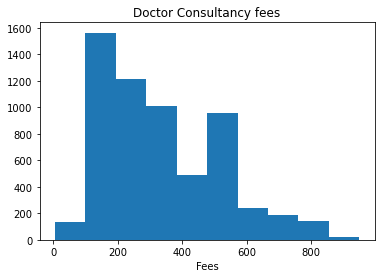

In [110]:
# Histogram Display distribution of data across Doctor Consultancy fees.
plt.hist(df['Fees'])
plt.xlabel('Fees')
plt.title('Doctor Consultancy fees')

<AxesSubplot:title={'center':'Profile vs Fees'}, xlabel='Profile', ylabel='Fees'>

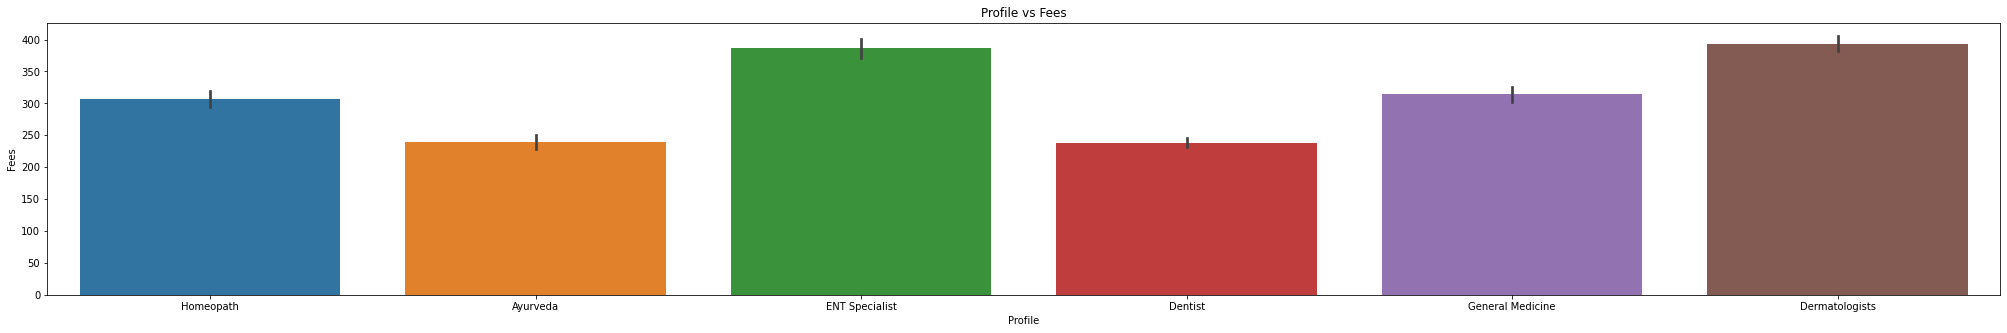

In [111]:
# Barplot Display distribution of data across all level of category
plt.figure(figsize=(35,5))
plt.title('Profile vs Fees')
sns.barplot(x='Profile',y='Fees',data=df)

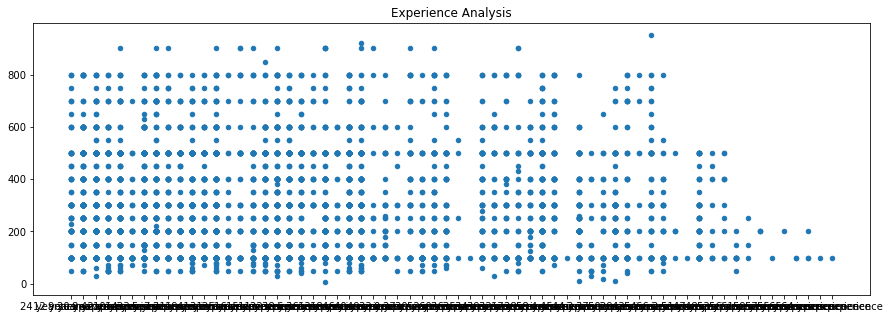

In [112]:
# Scatterplot Display distribution of data across Experience Analysis.
plt.figure(figsize=(15,5))
plt.title('Experience Analysis')
plt.scatter(df['Experience'],df['Fees'],s=20)
plt.show()

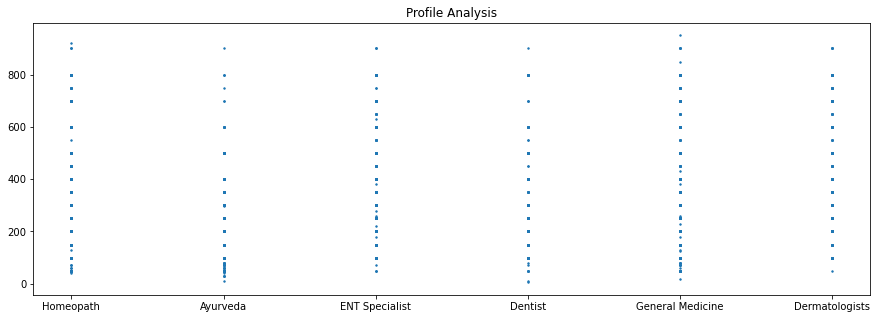

In [113]:
# Scatterplot Display distribution of data across Profile Analysis.
plt.figure(figsize=(15,5))
plt.title('Profile Analysis')
plt.scatter(df['Profile'],df['Fees'],s=2)
plt.show()

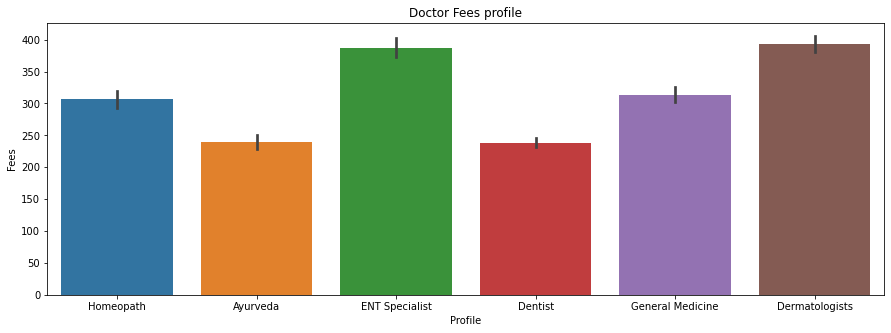

In [114]:
# Barplot Display distribution of data across Doctor Fees Analysis.
plt.figure(figsize=(15,5))
plt.title('Doctor Fees profile')
sns.barplot(x='Profile',y='Fees',data=df)
plt.show()

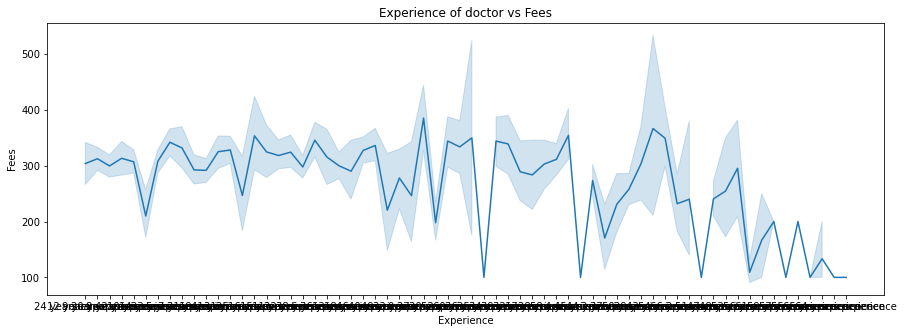

In [115]:
# Lineplot Display distribution of data across Experience of doctor vs Fees.
plt.figure(figsize=(15,5))
plt.title('Experience of doctor vs Fees')
sns.lineplot(x='Experience',y='Fees',data=df)
plt.show()

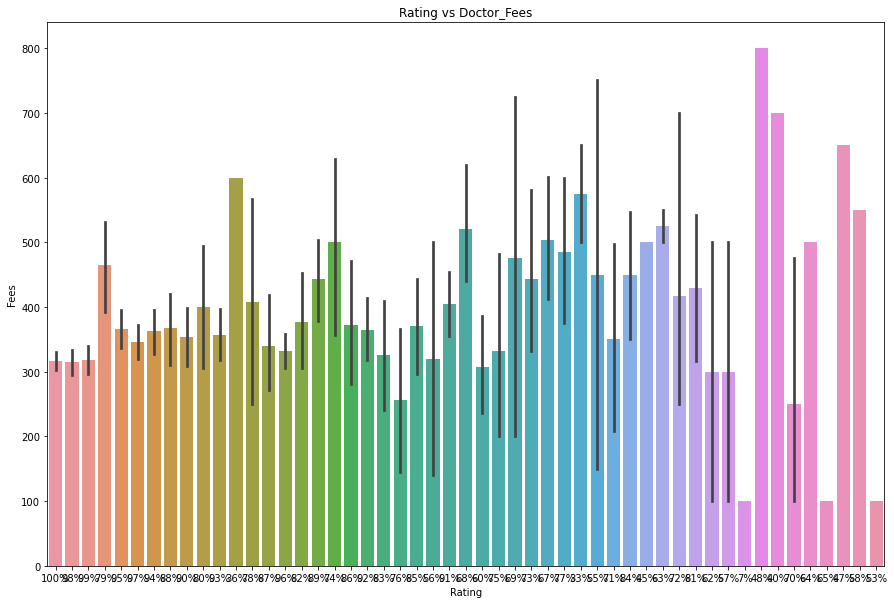

In [116]:
# Barplot Display distribution of data across Rating vs Doctor_Fees.
plt.figure(figsize=(15,10))
plt.title('Rating vs Doctor_Fees')
sns.barplot(x='Rating',y='Fees',data=df)
plt.show()

<AxesSubplot:xlabel='Fees', ylabel='Density'>

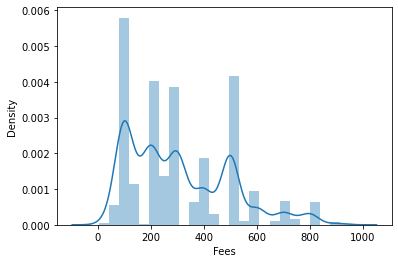

In [117]:
# Distplot Display distribution of data across Fees.
sns.distplot(df['Fees'])

# Preprocessing

In [118]:
df.columns

Index(['Qualification', 'Experience', 'Rating', 'Place', 'Profile',
       'Miscellaneous_Info', 'Fees'],
      dtype='object')

In [119]:
df['Qualification'].unique()

array(['BHMS, MD - Homeopathy', 'BAMS, MD - Ayurveda Medicine',
       'MBBS, MS - Otorhinolaryngology', ...,
       'MD - Dermatology , Venereology & Leprosy, MBBS, Fellowship In Dermatosurgery',
       'BDS, certification in smile designing',
       'MD - Homeopathy, Post Graduate Diploma in Healthcare Management(PGDHM), DHMS (Diploma in Homeopathic Medicine and Surgery)'],
      dtype=object)

In [120]:
df['Experience'].unique()

array(['24 years experience', '12 years experience', '9 years experience',
       '20 years experience', '8 years experience', '42 years experience',
       '10 years experience', '14 years experience',
       '23 years experience', '5 years experience', '7 years experience',
       '21 years experience', '19 years experience',
       '41 years experience', '31 years experience',
       '25 years experience', '16 years experience',
       '15 years experience', '11 years experience',
       '22 years experience', '38 years experience', '6 years experience',
       '36 years experience', '13 years experience',
       '18 years experience', '46 years experience',
       '40 years experience', '49 years experience',
       '33 years experience', '0 years experience', '27 years experience',
       '30 years experience', '52 years experience',
       '60 years experience', '26 years experience',
       '35 years experience', '34 years experience',
       '39 years experience', '32 years exp

In [121]:
df['Rating'].unique()

array(['100%', '98%', nan, '99%', '79%', '95%', '97%', '94%', '88%',
       '90%', '80%', '93%', '36%', '78%', '87%', '96%', '82%', '89%',
       '74%', '86%', '92%', '83%', '76%', '85%', '56%', '91%', '68%',
       '60%', '75%', '69%', '73%', '67%', '77%', '33%', '55%', '71%',
       '84%', '45%', '63%', '72%', '81%', '62%', '57%', '7%', '48%',
       '40%', '70%', '64%', '65%', '47%', '58%', '53%'], dtype=object)

In [122]:
df['Place'].unique()

array(['Kakkanad, Ernakulam', 'Whitefield, Bangalore',
       'Mathikere - BEL, Bangalore', 'Bannerghatta Road, Bangalore',
       'Keelkattalai, Chennai', 'Porur, Chennai', 'Karol Bagh, Delhi',
       'Arekere, Bangalore', 'Old City, Hyderabad', 'Athani, Ernakulam',
       'Thousand Lights, Chennai', 'Somajiguda, Hyderabad',
       'Coimbatore Racecourse, Coimbatore', 'Jubilee Hills, Hyderabad',
       'Kondli, Delhi', 'Saroor Nagar, Hyderabad',
       'Tambaram West, Chennai', 'Purasawakkam, Chennai',
       'KPHB, Hyderabad', 'HSR Layout, Bangalore', 'Pollachi, Coimbatore',
       'Vasundhra Enclave, Delhi', 'Chembur, Mumbai',
       'Thammanam, Ernakulam', 'Andheri, Mumbai',
       'Pattom, Thiruvananthapuram', 'Kukatpally, Hyderabad',
       'Vadavalli, Coimbatore', 'Defence Colony, Delhi',
       'Banjara Hills, Hyderabad', 'Sion West, Mumbai', 'CR Park, Delhi',
       'Mogappair East, Chennai', 'IP Extension, Delhi',
       'Safdarjung Enclave, Delhi', 'New Friends Colony, Delhi

In [123]:
df['Profile'].unique()

array(['Homeopath', 'Ayurveda', 'ENT Specialist', 'Dentist',
       'General Medicine', 'Dermatologists'], dtype=object)

In [124]:
df['Miscellaneous_Info'].unique()

array(['100% 16 Feedback Kakkanad, Ernakulam',
       '98% 76 Feedback Whitefield, Bangalore', nan, ...,
       '98% 45 Feedback Basavanagudi, Bangalore',
       '97% 11 Feedback Greater Kailash Part 2, Delhi',
       'General Medical Consultation Viral Fever Treatment Infectious Disease Treatment'],
      dtype=object)

In [125]:
df.describe()                            #statistics summary for numerical columns

,Fees
count,5961.000000
mean,307.944640
std,190.920373
min,5.000000
25%,150.000000
50%,300.000000
75%,500.000000
max,950.000000


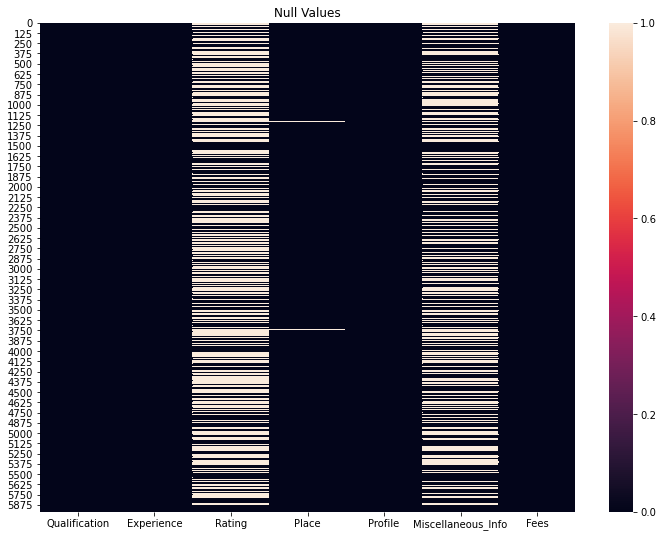

In [126]:
# Heatmap Display distribution of data across Null values
plt.figure(figsize=(12,9))
sns.heatmap(df.isnull())
plt.title('Null Values')
plt.show()

In [127]:
#Checking the null values in dataset
df.isnull().sum()

Qualification            0
Experience               0
Rating                3302
Place                   25
Profile                  0
Miscellaneous_Info    2620
Fees                     0
dtype: int64

In [128]:
#filling the missing values for categorical terms by mode
df['Rating']=df['Rating'].fillna(df['Rating'].mode()[0])
df['Miscellaneous_Info']=df['Miscellaneous_Info'].fillna(df['Miscellaneous_Info'].mode()[0])
df['Place']=df['Place'].fillna(df['Place'].mode()[0])

In [129]:
df.isnull().sum()

Qualification         0
Experience            0
Rating                0
Place                 0
Profile               0
Miscellaneous_Info    0
Fees                  0
dtype: int64

Converting all Object attributes into Numerical attributes by using LabelEncoder

In [130]:
df.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,100%,"Mathikere - BEL, Bangalore",ENT Specialist,Acrylic Partial Denture Crowns and Bridges Fix...,300
3,"BSc - Zoology, BAMS",12 years experience,100%,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250


In [131]:
from sklearn.preprocessing import LabelEncoder
l=LabelEncoder()

In [132]:
for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=l.fit_transform(df[i].values)

In [133]:
df.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,401,16,0,299,5,130,100
1,73,3,49,866,0,1422,350
2,1135,63,0,457,3,1595,300
3,464,3,0,68,0,1695,250
4,10,12,0,337,0,253,250


In [134]:
df.describe()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
count,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000
mean,596.857574,23.010904,14.534139,414.368059,2.441872,1573.343902,307.944640
std,413.842446,20.937163,21.137633,258.547684,1.658014,640.388185,190.920373
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000
25%,219.000000,6.000000,0.000000,197.000000,1.000000,1477.000000,150.000000
50%,596.000000,15.000000,0.000000,407.000000,2.000000,1595.000000,300.000000
75%,943.000000,36.000000,42.000000,628.000000,4.000000,1746.000000,500.000000
max,1419.000000,63.000000,50.000000,876.000000,5.000000,2997.000000,950.000000


<AxesSubplot:>

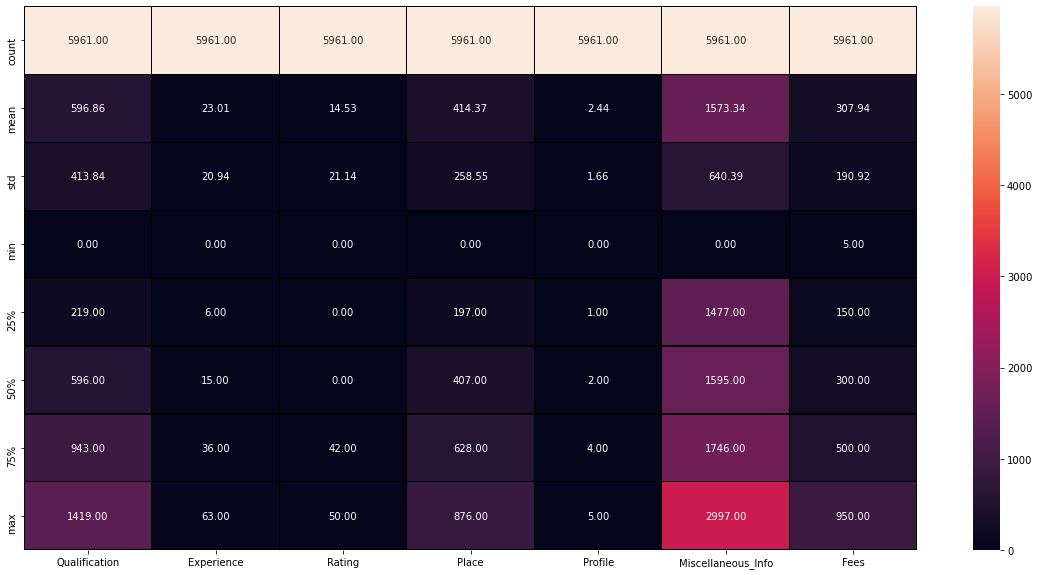

In [135]:
# Heatmap Display distribution of data across all level of category.
plt.figure(figsize=(20,10))
sns.heatmap(df.describe(),annot=True,linewidths=0.1,linecolor='black',fmt='0.2f')

# Correlation Matrix

In [136]:
dfcor=df.corr()                                       # Check the correlation of datasets
dfcor 

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
Qualification,1.000000,0.003325,0.055188,0.006640,0.393123,-0.132786,0.263214
Experience,0.003325,1.000000,-0.139696,0.001328,-0.032711,0.035956,-0.048529
Rating,0.055188,-0.139696,1.000000,-0.031150,-0.101605,-0.077996,0.141853
Place,0.006640,0.001328,-0.031150,1.000000,0.019529,0.027901,-0.052505
Profile,0.393123,-0.032711,-0.101605,0.019529,1.000000,-0.155324,0.145226
Miscellaneous_Info,-0.132786,0.035956,-0.077996,0.027901,-0.155324,1.000000,-0.060713
Fees,0.263214,-0.048529,0.141853,-0.052505,0.145226,-0.060713,1.000000


<AxesSubplot:>

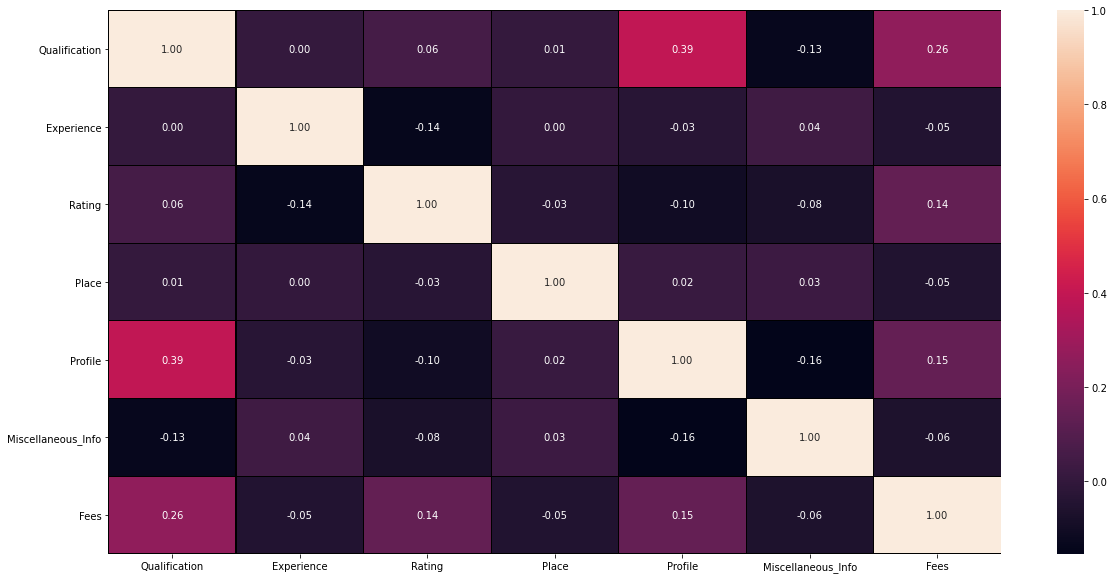

In [137]:
# Heatmap Display distribution of data across all level of category.
plt.figure(figsize=(20,10))
sns.heatmap(dfcor,annot=True,linewidths=0.1,linecolor='black',fmt='0.2f')

# Removing Outliers from the Dataset

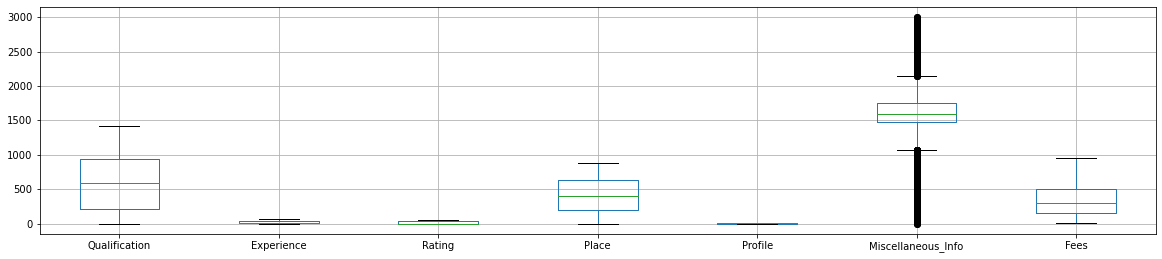

In [138]:
# Boxplot Display distribution of data across all level of category.
df.boxplot(figsize=[20,5])
plt.subplots_adjust(bottom=0.25)
plt.show()

In [139]:
from scipy.stats import zscore

In [140]:
z=np.abs(zscore(df))
z

array([[4.73305738e-01, 3.34882629e-01, 6.87653037e-01, ...,
        1.54301587e+00, 2.25404687e+00, 1.08926083e+00],
       [1.26594438e+00, 9.55840219e-01, 1.63068173e+00, ...,
        1.47289258e+00, 2.36351328e-01, 2.20295441e-01],
       [1.30046489e+00, 1.91011789e+00, 6.87653037e-01, ...,
        3.36652489e-01, 3.38199785e-02, 4.16158134e-02],
       ...,
       [2.07239780e-03, 5.72670771e-01, 1.58336878e+00, ...,
        9.39834180e-01, 6.25210608e-01, 1.52985171e+00],
       [8.36481290e-01, 8.12542314e-01, 1.25217810e+00, ...,
        9.39834180e-01, 9.81762078e-01, 1.08926083e+00],
       [8.55125573e-01, 7.17010377e-01, 6.87653037e-01, ...,
        8.69710893e-01, 3.38199785e-02, 5.65438323e-01]])

In [141]:
df_new=df[(z<3).all(axis=1)]
df_new.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,401,16,0,299,5,130,100
1,73,3,49,866,0,1422,350
2,1135,63,0,457,3,1595,300
3,464,3,0,68,0,1695,250
4,10,12,0,337,0,253,250


In [142]:
df.shape

(5961, 7)

In [143]:
df_new.shape

(5941, 7)

In [144]:
Data_loss=((5961-5941)/5961*100)
Data_loss

0.33551417547391377

# Checking Skewness of the dataset

In [145]:
df.skew()

Qualification         0.239720
Experience            0.823531
Rating                0.817666
Place                 0.124862
Profile               0.108803
Miscellaneous_Info   -0.218459
Fees                  0.751870
dtype: float64

In [146]:
x= df.drop('Fees',axis=1)
y= df['Fees']

In [147]:
from sklearn.preprocessing import power_transform
df_new=power_transform(x)

df_new=pd.DataFrame(df_new,columns=x.columns)

In [148]:
df_new.skew()

Qualification        -0.298616
Experience           -0.066770
Rating                0.721289
Place                -0.263388
Profile              -0.139151
Miscellaneous_Info   -0.133335
dtype: float64

In [149]:
x=df_new
x.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
0,-0.268192,0.031850,-0.703279,-0.298729,1.420559,-2.200692
1,-1.399319,-1.202914,1.444229,1.521043,-1.644145,-0.249736
2,1.173386,1.479654,-0.703279,0.286121,0.418830,0.022175
3,-0.112357,-1.202914,-0.703279,-1.457929,-1.644145,0.180028
4,-1.876273,-0.221760,-0.703279,-0.149246,-1.644145,-2.026279


# Linear Regression Model

In [150]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

In [151]:
for i in range(0,10):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=i)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    print(f'At random state {i},the training accuracy is:{r2_score(y_train,pred_train)}')
    print(f'At random state {i},the testing accuracy is:{r2_score(y_test,pred_test)}')
    print('\n')

At random state 0,the training accuracy is:0.0922932894296622
At random state 0,the testing accuracy is:0.1021042351078214


At random state 1,the training accuracy is:0.0899708339344224
At random state 1,the testing accuracy is:0.10978162997972551


At random state 2,the training accuracy is:0.10187258243689146
At random state 2,the testing accuracy is:0.08436907896220791


At random state 3,the training accuracy is:0.10640957120653793
At random state 3,the testing accuracy is:0.07618924692907836


At random state 4,the training accuracy is:0.09726077557870161
At random state 4,the testing accuracy is:0.09438939596235296


At random state 5,the training accuracy is:0.10618329507627133
At random state 5,the testing accuracy is:0.07583041912552091


At random state 6,the training accuracy is:0.09664812241910625
At random state 6,the testing accuracy is:0.09374721429937516


At random state 7,the training accuracy is:0.10983591347593513
At random state 7,the testing accuracy is:0.0620527

In [152]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.7,random_state=0)
lr.fit(x_train,y_train)

LinearRegression()

In [153]:
print(lr.intercept_)

304.8870947611461


In [154]:
coeff_df=pd.DataFrame(lr.coef_,x.columns,columns=['Co-efficient'])
coeff_df

,Co-efficient
Qualification,39.302002
Experience,-0.384047
Rating,30.069772
Place,-5.166654
Profile,16.612847
Miscellaneous_Info,3.218462


In [155]:
y_pred=lr.predict(x_test)

In [156]:
df=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
df.head()

,Actual,Predicted
1398,300,175.530475
4310,500,287.779785
2455,250,279.925307
2285,800,318.831873
3891,100,177.461721


In [157]:
print("error:")
print("Mean absolute error:",mean_absolute_error(y_test,y_pred))
print("Mean squared error:",mean_squared_error(y_test,y_pred))
print("Root mean squared error:",np.sqrt(mean_squared_error(y_test,y_pred)))

error:
Mean absolute error: 147.00107549042383
Mean squared error: 32954.39924075868
Root mean squared error: 181.53346589749967


In [158]:
predict_test=lr.predict(x_test)
print(r2_score(y_test,predict_test)*100)

9.398537867717248


In [159]:
predict_train=lr.predict(x_train)
print(r2_score(y_train,predict_train)*100)

9.416001549305397


In [160]:
Train_accuracy=r2_score(y_train,predict_train)
Test_accuracy=r2_score(y_test,predict_test)

from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score=cross_val_score(lr,x,y,cv=j)
    cv_mean=cv_score.mean()
    print(f'At cross fold(j) the cv score is {cv_mean} and accuracy score for training is {Train_accuracy} and accuracy score  for the {Test_accuracy}')
    print('\n')

At cross fold(j) the cv score is 0.09536843025404101 and accuracy score for training is 0.09416001549305397 and accuracy score  for the 0.09398537867717249


At cross fold(j) the cv score is 0.09470696215621928 and accuracy score for training is 0.09416001549305397 and accuracy score  for the 0.09398537867717249


At cross fold(j) the cv score is 0.09541794978217397 and accuracy score for training is 0.09416001549305397 and accuracy score  for the 0.09398537867717249


At cross fold(j) the cv score is 0.09383082141538646 and accuracy score for training is 0.09416001549305397 and accuracy score  for the 0.09398537867717249


At cross fold(j) the cv score is 0.09380556401186808 and accuracy score for training is 0.09416001549305397 and accuracy score  for the 0.09398537867717249


At cross fold(j) the cv score is 0.09362125472796896 and accuracy score for training is 0.09416001549305397 and accuracy score  for the 0.09398537867717249


At cross fold(j) the cv score is 0.09437858856311937

Lets plot with y_test vs prediction

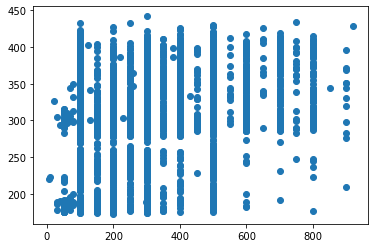

In [161]:
plt.scatter(x=y_test,y=predict_test)

# Decision Tree Regressor Model

In [162]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

In [163]:
for i in range(0,10):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=i)
    dtr.fit(x_train,y_train)
    pred_train=dtr.predict(x_train)
    pred_test=dtr.predict(x_test)
    print(f'At random state {i},the training accuracy is:{r2_score(y_train,pred_train)}')
    print(f'At random state {i},the testing accuracy is:{r2_score(y_test,pred_test)}')
    print('\n')

At random state 0,the training accuracy is:0.9993768285425757
At random state 0,the testing accuracy is:-0.5576122300505479


At random state 1,the training accuracy is:0.9993947748682056
At random state 1,the testing accuracy is:-0.6526475790539599


At random state 2,the training accuracy is:0.9987406712959734
At random state 2,the testing accuracy is:-0.7186279248905798


At random state 3,the training accuracy is:0.9991955981546822
At random state 3,the testing accuracy is:-0.5848169839164965


At random state 4,the training accuracy is:0.9982686250043206
At random state 4,the testing accuracy is:-0.5272714115106949


At random state 5,the training accuracy is:0.9993878025828331
At random state 5,the testing accuracy is:-0.6544192608375279


At random state 6,the training accuracy is:0.9984821947026611
At random state 6,the testing accuracy is:-0.47649359024725224


At random state 7,the training accuracy is:0.9991856745784359
At random state 7,the testing accuracy is:-0.7082131509

In [164]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.7,random_state=9)
dtr.fit(x_train,y_train)

DecisionTreeRegressor()

In [165]:
pred=lr.predict(x_test)

In [166]:
df=pd.DataFrame({'Actual':y_test,'Predicted':pred})
df.head()

,Actual,Predicted
1204,150,308.147585
1758,500,248.508197
4464,500,311.342671
5357,100,301.207749
1655,200,305.588414


In [167]:
print("error:")
print("Mean absolute error:",mean_absolute_error(y_test,pred))
print("Mean squared error:",mean_squared_error(y_test,pred))
print("Root mean squared error:",np.sqrt(mean_squared_error(y_test,pred)))

error:
Mean absolute error: 147.88742191451124
Mean squared error: 33176.46524843678
Root mean squared error: 182.1440782689264


In [168]:
predict_test=dtr.predict(x_test)
print(r2_score(y_test,predict_test)*100)

-76.30373949296067


In [169]:
predict_train=dtr.predict(x_train)
print(r2_score(y_train,predict_train)*100)

99.92935901403376


In [170]:
Train_accuracy=r2_score(y_train,predict_train)
Test_accuracy=r2_score(y_test,predict_test)

from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score=cross_val_score(dtr,x,y,cv=j)
    cv_mean=cv_score.mean()
    print(f'At cross fold(j) the cv score is {cv_mean} and accuracy score for training is {Train_accuracy} and accuracy score  for the {Test_accuracy}')
    print('\n')

At cross fold(j) the cv score is -0.5970795367880666 and accuracy score for training is 0.9992935901403377 and accuracy score  for the -0.7630373949296068


At cross fold(j) the cv score is -0.5385836447314707 and accuracy score for training is 0.9992935901403377 and accuracy score  for the -0.7630373949296068


At cross fold(j) the cv score is -0.573900697080562 and accuracy score for training is 0.9992935901403377 and accuracy score  for the -0.7630373949296068


At cross fold(j) the cv score is -0.5854074299413519 and accuracy score for training is 0.9992935901403377 and accuracy score  for the -0.7630373949296068


At cross fold(j) the cv score is -0.5764800478178116 and accuracy score for training is 0.9992935901403377 and accuracy score  for the -0.7630373949296068


At cross fold(j) the cv score is -0.5691270758122311 and accuracy score for training is 0.9992935901403377 and accuracy score  for the -0.7630373949296068


At cross fold(j) the cv score is -0.5510252461696757 and ac

Lets plot with y_test vs prediction

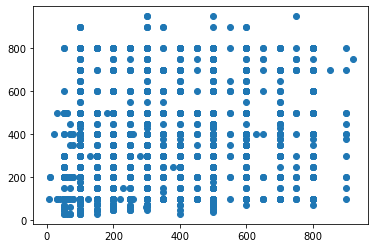

In [171]:
plt.scatter(x=y_test,y=predict_test)

# Random Forest Regressor Model

In [172]:
from sklearn.ensemble import RandomForestRegressor
rdr=RandomForestRegressor()
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

In [173]:
for i in range(0,10):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=i)
    rdr.fit(x_train,y_train)
    pred_train=rdr.predict(x_train)
    pred_test=rdr.predict(x_test)
    print(f'At random state {i},the training accuracy is:{r2_score(y_train,pred_train)}')
    print(f'At random state {i},the testing accuracy is:{r2_score(y_test,pred_test)}')
    print('\n')

At random state 0,the training accuracy is:0.8805090383463556
At random state 0,the testing accuracy is:0.16304277093931974


At random state 1,the training accuracy is:0.8804184210138061
At random state 1,the testing accuracy is:0.14699588107414563


At random state 2,the training accuracy is:0.8808655339902268
At random state 2,the testing accuracy is:0.13613125464190723


At random state 3,the training accuracy is:0.8806578827052838
At random state 3,the testing accuracy is:0.1318256708051616


At random state 4,the training accuracy is:0.8796145034104221
At random state 4,the testing accuracy is:0.1585936661882008


At random state 5,the training accuracy is:0.8798763821373269
At random state 5,the testing accuracy is:0.13914509403501574


At random state 6,the training accuracy is:0.8817244178858319
At random state 6,the testing accuracy is:0.15124496681860145


At random state 7,the training accuracy is:0.8834085385445692
At random state 7,the testing accuracy is:0.10873176557543

In [174]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.7,random_state=6)
rdr.fit(x_train,y_train)

RandomForestRegressor()

In [175]:
pred=rdr.predict(x_test)

In [176]:
df=pd.DataFrame({'Actual':y_test,'Predicted':pred})
df.head()

,Actual,Predicted
4136,200,265.0
4446,100,306.5
748,500,511.0
1350,600,490.5
4835,900,360.5


In [177]:
print("error:")
print("Mean absolute error:",mean_absolute_error(y_test,pred))
print("Mean squared error:",mean_squared_error(y_test,pred))
print("Root mean squared error:",np.sqrt(mean_squared_error(y_test,pred)))

error:
Mean absolute error: 139.6918073100316
Mean squared error: 31677.467455374634
Root mean squared error: 177.9816492096155


In [178]:
predict_test=rdr.predict(x_test)
print(r2_score(y_test,predict_test)*100)

12.47976778336376


In [179]:
predict_train=rdr.predict(x_train)
print(r2_score(y_train,predict_train)*100)

87.72920168121608


In [180]:
Train_accuracy=r2_score(y_train,predict_train)
Test_accuracy=r2_score(y_test,predict_test)

from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score=cross_val_score(rdr,x,y,cv=j)
    cv_mean=cv_score.mean()
    print(f'At cross fold(j) the cv score is {cv_mean} and accuracy score for training is {Train_accuracy} and accuracy score  for the {Test_accuracy}')
    print('\n')

At cross fold(j) the cv score is 0.14356830799240727 and accuracy score for training is 0.8772920168121608 and accuracy score  for the 0.1247976778336376


At cross fold(j) the cv score is 0.1508202023101497 and accuracy score for training is 0.8772920168121608 and accuracy score  for the 0.1247976778336376


At cross fold(j) the cv score is 0.156336127146021 and accuracy score for training is 0.8772920168121608 and accuracy score  for the 0.1247976778336376


At cross fold(j) the cv score is 0.1608750609978072 and accuracy score for training is 0.8772920168121608 and accuracy score  for the 0.1247976778336376


At cross fold(j) the cv score is 0.1620152039099528 and accuracy score for training is 0.8772920168121608 and accuracy score  for the 0.1247976778336376


At cross fold(j) the cv score is 0.1556860968888929 and accuracy score for training is 0.8772920168121608 and accuracy score  for the 0.1247976778336376


At cross fold(j) the cv score is 0.1574990669299624 and accuracy score

Lets plot with y_test vs prediction

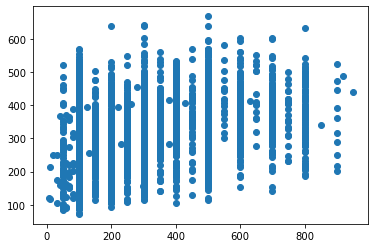

In [181]:
plt.scatter(x=y_test,y=predict_test)

<AxesSubplot:xlabel='Fees', ylabel='Density'>

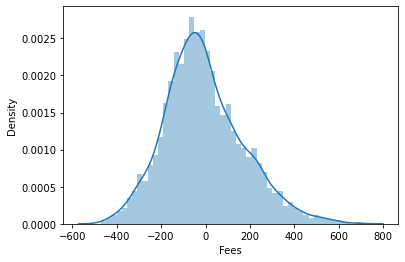

In [182]:
sns.distplot((y_test-predict_test),bins=50)

# Hyper Parameter Tuning

Hyper Parameter Tuning for Linear Regression

In [183]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
parameters={'alpha':[.0001,.001,0.1,.1,1,10],'random_state':list(range(0,10))}
ls=Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'alpha': 0.1, 'random_state': 0}


In [184]:
ls=Lasso(alpha=0.1,random_state=0)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)
pred_decision=ls.predict(x_test)
lss=r2_score(y_test,pred_decision)
print('R2 Score:',lss*100)
lsscore=cross_val_score(ls,x,y,cv=5)
lsc=lsscore.mean()
print('Cross Val Score:',lsc*100)

R2 Score: 8.957319112512096
Cross Val Score: 9.386107658639819


Hyper Parameter Tuning for Decision Tree Regressor

In [185]:
from sklearn.model_selection import GridSearchCV
parameters = {'max_depth': np.arange(2, 15),'random_state':list(range(0,10))}
GCV=GridSearchCV(DecisionTreeRegressor(),parameters,cv=5)
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                         'random_state': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]})

In [186]:
GCV.best_params_

{'max_depth': 3, 'random_state': 0}

In [187]:
dtr=DecisionTreeRegressor(max_depth=3,random_state=0)

dtr.fit(x_train,y_train)
dtr.score(x_train,y_train)
pred_decision=dtr.predict(x_test)
dtrs=r2_score(y_test,pred_decision)
print('R2 Score:',dtrs*100)
dtrscore=cross_val_score(dtr,x,y,cv=5)
dtrc=dtrscore.mean()
print('Cross Val Score:',dtrc*100)

R2 Score: 12.142692895915841
Cross Val Score: 11.426350167916096


Hyper Parameter Tuning for Random Forest Regressor

In [188]:
from sklearn.model_selection import GridSearchCV
parameters={'criterion':['mse','mae'],'max_features':['auto','sqrt','log2'],'random_state':list(range(0,10))}
rdr=RandomForestRegressor()
clf=GridSearchCV(rdr,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'criterion': 'mae', 'max_features': 'sqrt', 'random_state': 1}


In [189]:
rdr=RandomForestRegressor(criterion='mae',max_features='sqrt',random_state=1)
rdr.fit(x_train,y_train)
rdr.score(x_train,y_train)
pred_decision=rdr.predict(x_test)
rdrs=r2_score(y_test,pred_decision)
print('R2 Score:',rdrs*100)
rdrscore=cross_val_score(rdr,x,y,cv=5)
rdrc=rdrscore.mean()
print('Cross Val Score:',rdrc*100)

R2 Score: 14.922765869317578
Cross Val Score: 17.54262351898848


Compare with Actual Final Vs Sample Prediction

,Y Test,Prediction
4136,200,265.0
4446,100,306.5
748,500,511.0
1350,600,490.5
4835,900,360.5


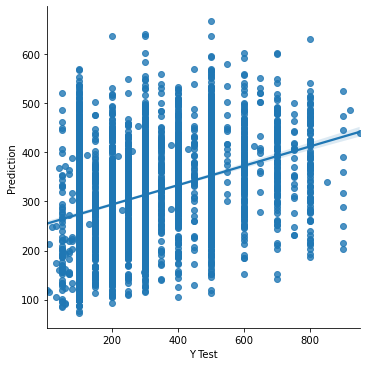

In [190]:
data=pd.DataFrame({'Y Test':y_test , 'Prediction':predict_test},columns=['Y Test','Prediction'])
sns.lmplot(x='Y Test',y='Prediction',data=data,palette='rainbow')
data.head()

# Saving the Model

In [191]:
import pickle
filename='Doctors Consultation Fees Prediction.pkl'
pickle.dump(rdr, open(filename, 'wb'))

# Conclusion

In [192]:
loaded_model = pickle.load(open('Doctors Consultation Fees Prediction.pkl', 'rb'))
result = loaded_model.score(x_test,y_test)
print(result*100)

14.922765869317578


In [193]:
conclusion=pd.DataFrame([loaded_model.predict(x_test)[:],pred_decision[:]],index=['Predicted','Original'])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,4163,4164,4165,4166,4167,4168,4169,4170,4171,4172
Predicted,288.0,229.5,423.5,475.5,336.0,438.5,480.0,316.8,198.2,256.0,...,229.8,275.0,263.5,362.0,346.5,290.0,320.5,464.5,216.7,474.5
Original,288.0,229.5,423.5,475.5,336.0,438.5,480.0,316.8,198.2,256.0,...,229.8,275.0,263.5,362.0,346.5,290.0,320.5,464.5,216.7,474.5
